In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math 
from math import sqrt

In [2]:
# read the data
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
# Dataframe shape
data.shape

(9134, 24)

In [3]:
# DataFrame info
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [4]:
# types of data
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# data describe 
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
# standarize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data = data.rename(columns={'EMPLOYMENTSTATUS':'EMPLOYMENT STATUS'})
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [7]:
# Check and deal with NaN values --> no Nan values
data.isnull().sum()


customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [8]:
#EDA (Exploratory Data Analysis) -

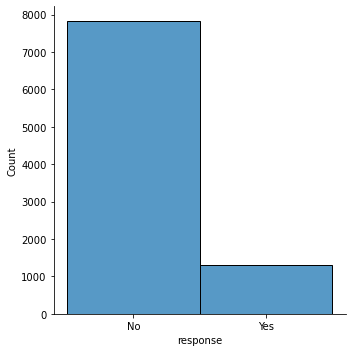

In [9]:
# Plot of the total number on a column
sns.displot(data['response'])
plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

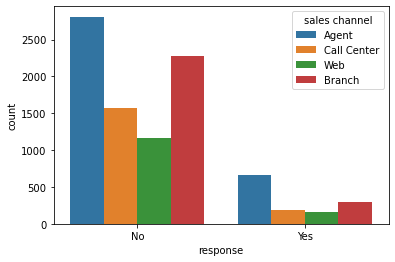

In [10]:
#plot of the response rate by the sales channel
sns.countplot(x="response", hue="sales channel", data=data)

In [11]:
#plot of the response rate by the total claim amount


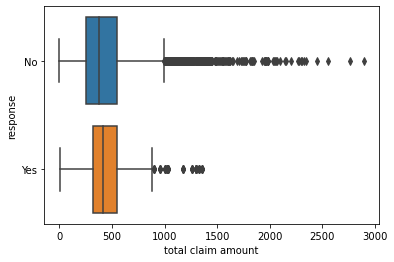

In [12]:
sns.boxplot(x="total claim amount", y="response", data=data)
plt.show()

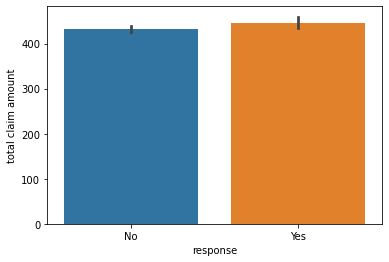

In [13]:
sns.barplot(x="response", y="total claim amount", data=data)
plt.show()

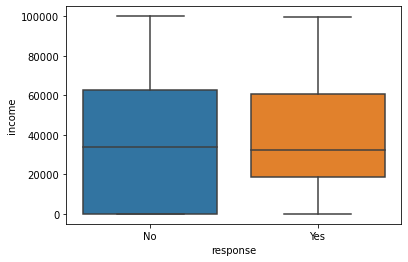

In [14]:
sns.boxplot(x="response", y="income", data=data)
plt.show()

In [18]:
# split X-y 
y = data['total claim amount']
X = data.drop(['total claim amount'], axis=1)

In [20]:
# Separate numerical from categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

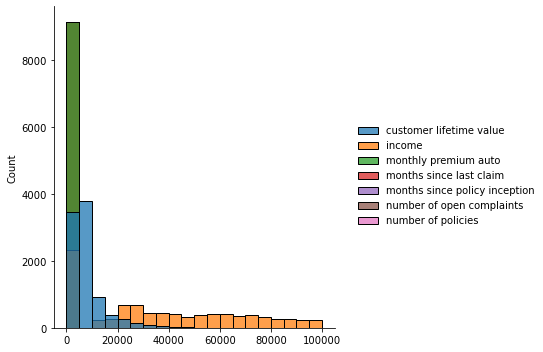

In [21]:
# check the normality of the numerical variables
sns.displot(X_num, bins=20)

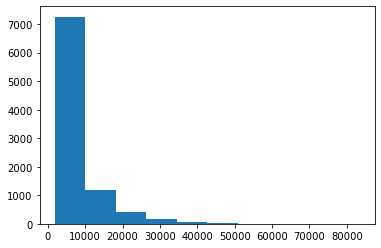

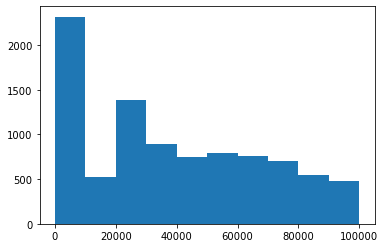

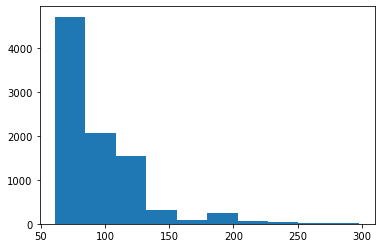

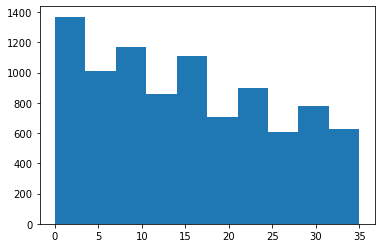

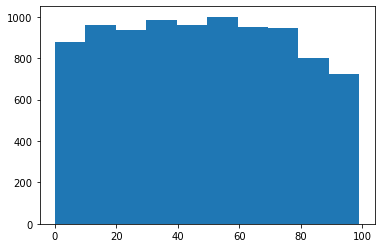

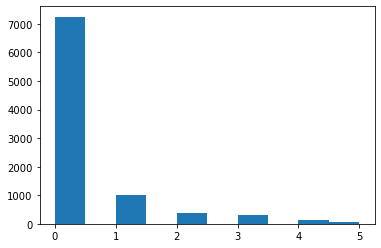

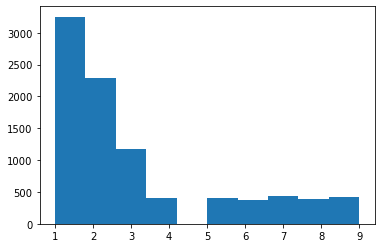

In [23]:
# Construc histograms using Matplotlib
for i in range(len(X_num.columns)):
    plt.hist(X_num[X_num.columns[i]]) 
    plt.show()

In [24]:
X_num.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


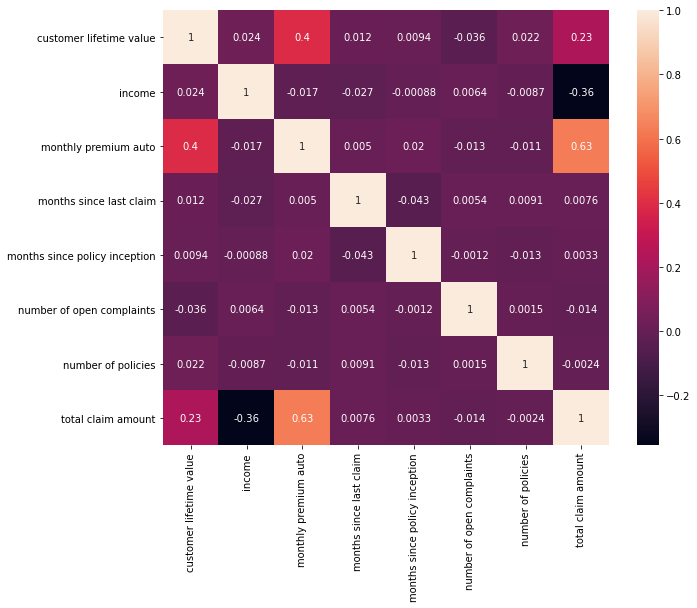

In [26]:
# correlation matrix
correlations_matrix = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [ ]:
#X_numerical
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)

In [ ]:
df_normalized = pd.DataFrame(x_normalized, columns = X_num.columns)

In [ ]:
df_normalized

In [ ]:
#X_categorical
X_cat.drop(['Customer', 'Effective To Date'], axis=1, inplace = True)

In [ ]:
#One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_cat)
encoder.categories_  


In [ ]:
# Checking the encoded categories
encoder.transform(X_cat).toarray()

In [ ]:
# Categories column names
column_names = encoder.get_feature_names(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

In [ ]:
# Get categories dataframe
df_encoded = pd.DataFrame(encoder.transform(X_cat).toarray(), columns = column_names)

In [ ]:
df_encoded.head()

In [ ]:
# Concatenating categorical and numerical
df_concat = pd.concat([df_normalized,df_encoded], axis=1)

In [ ]:
df_concat.head()

In [ ]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(df_concat, y, test_size=0.2)

In [ ]:
# Fitting the model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
# Make predictions
predictions = lm.predict(X_test)
#R2
print("The R2 of the linear model is:", round(r2_score(y_test, y_test, predictions),2))
#MSE
mse = mean_squared_error(y_test, predictions)
print(mse)
#RMSE
rmse = math.sqrt(mse)
print(rmse)


In [ ]:
predictions